In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<br>
read data_1  -- albums names and sales(!) (scraped from wikipedia)<br>
read lyricDataset -- albums names and lyrics(!) (API from Genius) 

In [2]:
df_1 = pd.read_csv('data_1.csv')
columns = ['Artist', 'Title', 'Album', 'Lyric_views', 'Release_date', 'Featured_art',
           '#_words', 'Lyrics']
df_2 = pd.read_csv('lyricDataset.csv', names = columns)

<br>
drop unnecessary columns

In [3]:
lyrics = df_2.drop(['Title', 'Release_date', 'Featured_art', '#_words'], axis = 1)
lyrics

,Artist,Album,Lyric_views,Lyrics
0,Miranda Lambert,The Weight of These Wings,42261,Sting of the needle dropping on a vinyl\nNeon ...
1,Miranda Lambert,The Weight of These Wings,40702,Hey there Mr. Tin Man\nYou don't know how luck...
2,Miranda Lambert,Platinum,29992,You only love me for my big sunglasses\nAnd my...
3,Miranda Lambert,Four the Record,29986,I cut my bangs with some rusty kitchen scissor...
4,Miranda Lambert,Platinum,26966,Stand on the bar stomp your feet start clapp...
...,...,...,...,...
1575,The Pharcyde,Labcabincalifornia,6382,You gotta get on up off of that bullshit stop...
1576,The Pharcyde,Labcabincalifornia,0,I was standing one of the cast of many\nI wou...
1577,The Pharcyde,Labcabincalifornia,0,The way that momma raised us was pure faith\nS...
1578,The Pharcyde,Labcabincalifornia,0,(yo yo yo)\nIf you're listening (x3)\n(yo y...


<br>
leave in dataframe "lyrics" only those rows which has albums from dataframe df_1 with sales

In [4]:
albums = np.array(df_1['Album'])
lyrics = lyrics[lyrics['Album'].isin(albums)]
lyrics

,Artist,Album,Lyric_views,Lyrics
122,Ariana Grande,Sweetener,3034628,You you love it how I move you\nYou love it h...
123,Ariana Grande,Dangerous Woman,2634773,I've been here all night (Ariana)\nI've been h...
124,Ariana Grande,Sweetener,2628876,Right now I'm in a state of mind\nI wanna be ...
125,Ariana Grande,Sweetener,1824759,Lacigam gnihtemos od ot\nThgin laiceps ruoy s'...
129,Ariana Grande,Sweetener,1138842,Mmm yeah yuh\n\nI thought you into my life (...
...,...,...,...,...
1519,Justin Timberlake,Man of the Woods,137506,Ain't no need of stopping girl\nYeah there a...
1541,Travis Scott,Birds in the Trap Sing McKnight,4067071,Yeah\n7:30 in the night yeah\nOoh-oooh ooh\n...
1544,Travis Scott,Birds in the Trap Sing McKnight,1847257,That coca\n\nI just poured an 8 in a liter\nTh...
1549,Travis Scott,Birds in the Trap Sing McKnight,1134501,Hmm hmm meh meh\nMmm meh meh meh\nHmm h...


<br>
now leave in dataframe "sales" only rows with albums from dataframe "lyrics"

In [5]:
albums = np.array(lyrics['Album'])
sales = df_1[df_1['Album'].isin(albums)]

In [6]:
sales

,Artist,Album,US sales
0,Kendrick Lamar,Section.80,130000.0
2,Kendrick Lamar,To Pimp a Butterfly,1050000.0
4,Childish Gambino,Camp,242000.0
5,Childish Gambino,Because the Internet,796000.0
9,Bruno Mars,24K Magic,1000000.0
...,...,...,...
160,The Weeknd,Beauty Behind the Madness,1230000.0
161,The Weeknd,Starboy,484000.0
162,Wu-Tang Clan,Enter the Wu-Tang (36 Chambers),3000000.0
163,Wu-Tang Clan,Wu-Tang Forever,2000000.0


In [7]:
sales.reset_index(drop=True, inplace=True)
lyrics.reset_index(drop=True, inplace=True)

In [8]:
sales['Album'].nunique()

90

In [9]:
lyrics['Album'].nunique()

90

In [10]:
lyrics['Album']

0                            Sweetener
1                      Dangerous Woman
2                            Sweetener
3                            Sweetener
4                            Sweetener
                    ...               
315                   Man of the Woods
316    Birds in the Trap Sing McKnight
317    Birds in the Trap Sing McKnight
318    Birds in the Trap Sing McKnight
319    Birds in the Trap Sing McKnight
Name: Album, Length: 320, dtype: object

<br>
take lyrics from "lyrics" and prepare it for analysis (take out punctuation and put in lowercase)

In [11]:
str_array = lyrics['Lyrics'].to_numpy()

In [12]:
length = len(str_array)

In [13]:
import string
for i in range(length):
    str_array[i] = str_array[i].translate(string.punctuation).replace('+', ' ').lower()

<br>
Run sentiment_analysis for each string (lyrics) and store result in 'sent_result'

In [14]:
sent_result = np.empty(length)

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
for i in range(length):
    sent_result[i] = analyzer.polarity_scores(str_array[i])['compound']

In [16]:
sent_result

array([ 0.9973, -0.5122,  0.9897,  0.9224,  0.9986,  0.9938,  0.9923,
       -0.9722, -0.9789,  0.9991,  0.9853,  0.9976,  0.8748,  0.9963,
        0.9992,  0.9995, -0.9971,  0.8759,  0.9562,  0.9807,  0.6966,
        0.9825,  0.9901,  0.9955,  0.9988, -0.9934,  0.9904,  0.9971,
        0.9863, -0.8246,  0.9376,  0.9928, -0.9825, -0.9844,  0.9903,
       -0.9547,  0.9877,  0.9821, -0.9114,  0.1672, -0.9924, -0.971 ,
        0.5269,  0.9954, -0.9349, -0.9879, -0.9197, -0.999 , -0.9894,
       -0.9993,  0.8901,  0.9947, -0.9939, -0.3773,  0.9945, -0.9822,
        0.9579,  0.9974,  0.2669,  0.9932, -0.2826,  0.9958,  0.9463,
       -0.9859, -0.7554,  0.9926,  0.9716,  0.9983,  0.9921,  0.9324,
        0.986 ,  0.9039,  0.9995,  0.988 ,  0.9936,  0.9793,  0.9952,
       -0.5499,  0.9936,  0.9618,  0.9751,  0.9951,  0.999 , -0.9522,
       -0.9969, -0.9858, -0.9828, -0.9996,  0.9233, -0.9823, -0.9978,
        0.8872, -0.9942, -0.979 , -0.9983, -0.9994, -0.9995,  0.9994,
       -0.9997, -0.9

In [17]:
x = pd.Series(sent_result)

In [18]:
lyrics = lyrics.assign(Sent = x)

In [19]:
lyrics

,Artist,Album,Lyric_views,Lyrics,Sent
0,Ariana Grande,Sweetener,3034628,you you love it how i move you you love it ho...,0.9973
1,Ariana Grande,Dangerous Woman,2634773,i've been here all night (ariana) i've been he...,-0.5122
2,Ariana Grande,Sweetener,2628876,right now i'm in a state of mind i wanna be i...,0.9897
3,Ariana Grande,Sweetener,1824759,lacigam gnihtemos od ot thgin laiceps ruoy s't...,0.9224
4,Ariana Grande,Sweetener,1138842,mmm yeah yuh i thought you into my life (wh...,0.9986
...,...,...,...,...,...
315,Justin Timberlake,Man of the Woods,137506,ain't no need of stopping girl yeah there ai...,-0.9719
316,Travis Scott,Birds in the Trap Sing McKnight,4067071,yeah 7:30 in the night yeah ooh-oooh ooh i ...,0.9965
317,Travis Scott,Birds in the Trap Sing McKnight,1847257,that coca i just poured an 8 in a liter throw...,-0.9854
318,Travis Scott,Birds in the Trap Sing McKnight,1134501,hmm hmm meh meh mmm meh meh meh hmm hmm...,0.9938


In [20]:
x = lyrics.groupby('Album')['Sent'].mean()

In [21]:
x = x.to_frame()

In [22]:
x

,Sent
Album,
...And Justice for All,-0.269633
1000 Forms of Fear,-0.008975
1989,-0.309300
24K Magic,0.675413
4:44,0.279240
...,...
Views,0.993533
Wrapped in Red,0.990400
Wu-Tang Forever,-0.582620


In [23]:
final = sales.set_index('Album').join(x)

In [24]:
final

,Artist,US sales,Sent
Album,,,
Section.80,Kendrick Lamar,130000.0,0.994700
To Pimp a Butterfly,Kendrick Lamar,1050000.0,-0.524400
Camp,Childish Gambino,242000.0,-0.122540
Because the Internet,Childish Gambino,796000.0,0.040944
24K Magic,Bruno Mars,1000000.0,0.675413
...,...,...,...
Beauty Behind the Madness,The Weeknd,1230000.0,0.315983
Starboy,The Weeknd,484000.0,-0.022817
Enter the Wu-Tang (36 Chambers),Wu-Tang Clan,3000000.0,-0.358108


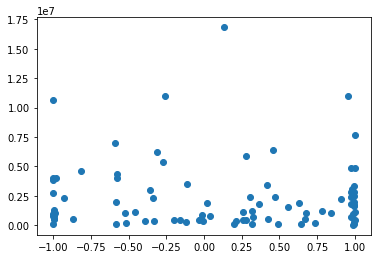

In [27]:
plt.scatter(final['Sent'], final['US sales'])